In [100]:
import itertools
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import figure

import glob

from datetime import datetime

import statsmodels.api as sm




In [101]:
def read_file_to_df(path):
    all_files = glob.glob(path + '/*.csv')
    df = pd.DataFrame()
    for filename in all_files:
        temp = pd.read_csv(filename)
        df = pd.concat([df, temp])
    return df



In [102]:
de_rompert = read_file_to_df('./data/den bosch/sewer_data_db/flow/de Rompert/')
'''
bokhoven = read_file_to_df('./data/den bosch/sewer_data_db/flow/Bokhoven/')


haarsteeg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Haarsteeg/')
helftheuvelweg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Helftheuvelweg/')
maaspoort = read_file_to_df('./data/den bosch/sewer_data_db/flow/Maaspoort/')
oud_engelseweg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Oud Engelseweg/')
engelerschans = read_file_to_df('./data/den bosch/sewer_data_db/flow/Engelerschans/')
'''

C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


"\nbokhoven = read_file_to_df('./data/den bosch/sewer_data_db/flow/Bokhoven/')\n\n\nhaarsteeg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Haarsteeg/')\nhelftheuvelweg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Helftheuvelweg/')\nmaaspoort = read_file_to_df('./data/den bosch/sewer_data_db/flow/Maaspoort/')\noud_engelseweg = read_file_to_df('./data/den bosch/sewer_data_db/flow/Oud Engelseweg/')\nengelerschans = read_file_to_df('./data/den bosch/sewer_data_db/flow/Engelerschans/')\n"

In [103]:
# de_rompert = de_rompert2
de_rompert.head()

,Unnamed: 0,datumBeginMeting,datumEindeMeting,datumMonster,historianEenheid,historianKwaliteit,historianTagnummer,hstWaarde
0,0,2018-01-06 23:59:00,2018-01-07 00:00:00,NaN,m/h,100.0,RWZI_DB/wl/TR/ntk1/1210FIT501/AN.Q,0.0
1,1,2018-01-06 23:58:00,2018-01-06 23:59:00,NaN,m/h,100.0,RWZI_DB/wl/TR/ntk1/1210FIT501/AN.Q,0.0
2,2,2018-01-06 23:57:00,2018-01-06 23:58:00,NaN,m/h,100.0,RWZI_DB/wl/TR/ntk1/1210FIT501/AN.Q,0.0
3,3,2018-01-06 23:56:00,2018-01-06 23:57:00,NaN,m/h,100.0,RWZI_DB/wl/TR/ntk1/1210FIT501/AN.Q,0.0
4,4,2018-01-06 23:55:00,2018-01-06 23:56:00,NaN,m/h,100.0,RWZI_DB/wl/TR/ntk1/1210FIT501/AN.Q,0.0


In [104]:
#name_list = [bokhoven, de_rompert, haarsteeg, helftheuvelweg, maaspoort, oud_engelseweg, engelerschans]

In [105]:
de_rompert = de_rompert[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]

'''
bokhoven = bokhoven[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
haarsteeg = haarsteeg[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
helftheuvelweg = helftheuvelweg[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
maaspoort = maaspoort[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
oud_engelseweg = oud_engelseweg[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]
engelerschans = engelerschans[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]


engelerschans.head()
'''

"\nbokhoven = bokhoven[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]\nhaarsteeg = haarsteeg[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]\nhelftheuvelweg = helftheuvelweg[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]\nmaaspoort = maaspoort[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]\noud_engelseweg = oud_engelseweg[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]\nengelerschans = engelerschans[['datumBeginMeting', 'datumEindeMeting', 'hstWaarde']]\n\n\nengelerschans.head()\n"

In [106]:
de_rompert = de_rompert.rename(columns={'hstWaarde' : 'de_rompert'})
'''
bokhoven = bokhoven.rename(columns ={'hstWaarde' : 'bokhoven'})


haarsteeg = haarsteeg.rename(columns={'hstWaarde' : 'haarsteeg'})
helftheuvelweg = helftheuvelweg.rename(columns={'hstWaarde' : 'helftheuvelweg'})
maaspoort = maaspoort.rename(columns={'hstWaarde' : 'maaspoort'})
oud_engelseweg = oud_engelseweg.rename(columns={'hstWaarde' : 'oud_engelseweg'})
engelerschans = engelerschans.rename(columns={'hstWaarde' : 'engelerschans'})
'''

"\nbokhoven = bokhoven.rename(columns ={'hstWaarde' : 'bokhoven'})\n\n\nhaarsteeg = haarsteeg.rename(columns={'hstWaarde' : 'haarsteeg'})\nhelftheuvelweg = helftheuvelweg.rename(columns={'hstWaarde' : 'helftheuvelweg'})\nmaaspoort = maaspoort.rename(columns={'hstWaarde' : 'maaspoort'})\noud_engelseweg = oud_engelseweg.rename(columns={'hstWaarde' : 'oud_engelseweg'})\nengelerschans = engelerschans.rename(columns={'hstWaarde' : 'engelerschans'})\n"

In [107]:
# display_side_by_side(bokhoven.head(), de_rompert.head(), haarsteeg.head(), helftheuvelweg.head()
#                      , maaspoort.head(), oud_engelseweg.head(), engelerschans.head())

In [108]:
de_rompert['datetime'] = pd.to_datetime(de_rompert['datumBeginMeting'], format = '%Y-%m-%d %H:%M:%S')

In [109]:
de_rompert

,datumBeginMeting,datumEindeMeting,de_rompert,datetime
0,2018-01-06 23:59:00,2018-01-07 00:00:00,0.0,2018-01-06 23:59:00
1,2018-01-06 23:58:00,2018-01-06 23:59:00,0.0,2018-01-06 23:58:00
2,2018-01-06 23:57:00,2018-01-06 23:58:00,0.0,2018-01-06 23:57:00
3,2018-01-06 23:56:00,2018-01-06 23:57:00,0.0,2018-01-06 23:56:00
4,2018-01-06 23:55:00,2018-01-06 23:56:00,0.0,2018-01-06 23:55:00
5,2018-01-06 23:54:00,2018-01-06 23:55:00,0.0,2018-01-06 23:54:00
6,2018-01-06 23:53:00,2018-01-06 23:54:00,0.0,2018-01-06 23:53:00
7,2018-01-06 23:52:00,2018-01-06 23:53:00,0.0,2018-01-06 23:52:00
8,2018-01-06 23:51:00,2018-01-06 23:52:00,0.0,2018-01-06 23:51:00
9,2018-01-06 23:50:00,2018-01-06 23:51:00,0.0,2018-01-06 23:50:00


In [110]:
de_rompert['datumBeginMeting'] = pd.to_datetime(de_rompert['datumBeginMeting'], format='%Y-%m-%d %H:%M:%S')
de_rompert = de_rompert.set_index('datumBeginMeting') # Datetime index

In [111]:
drylist = ['dry_rompert', 'dry_bokhoven', 'dry_haarsteeg', 'dry_helftheuvelweg', 'dry_maaspoort', 'dry_oudengelseweg']

In [112]:
def dry_df(df):
    df = pd.read_csv(df, sep="\n", header=None)
    df.columns = ["a"]
    df['datetime'] = pd.to_datetime(df['a'], format = '%Y-%m-%d %H:%M:%S')
    df = df[['datetime']]
    return df

dry_rompert = dry_df('dry_rompert')
dry_bokhoven = dry_df('dry_bokhoven')
dry_haarsteeg = dry_df('dry_haarsteeg')
dry_helftheuvelweg = dry_df('dry_helftheuvelweg')
dry_maaspoort = dry_df('dry_maaspoort')
dry_oudengelseweg = dry_df('dry_oudengelseweg')

In [113]:
drydfs = [dry_rompert, dry_bokhoven, dry_haarsteeg, dry_helftheuvelweg, dry_maaspoort, dry_oudengelseweg]

In [114]:
de_rompert.head()

,datumEindeMeting,de_rompert,datetime
datumBeginMeting,,,
2018-01-06 23:59:00,2018-01-07 00:00:00,0.0,2018-01-06 23:59:00
2018-01-06 23:58:00,2018-01-06 23:59:00,0.0,2018-01-06 23:58:00
2018-01-06 23:57:00,2018-01-06 23:58:00,0.0,2018-01-06 23:57:00
2018-01-06 23:56:00,2018-01-06 23:57:00,0.0,2018-01-06 23:56:00
2018-01-06 23:55:00,2018-01-06 23:56:00,0.0,2018-01-06 23:55:00


In [115]:
de_rompert = de_rompert.groupby(pd.TimeGrouper('5Min'))['de_rompert'].mean()

# '''
# bokhoven = bokhoven.groupby(pd.TimeGrouper('5Min'))['bokhoven'].mean()
# haarsteeg = haarsteeg.groupby(pd.TimeGrouper('5Min'))['haarsteeg'].mean()
# helftheuvelweg = helftheuvelweg.groupby(pd.TimeGrouper('5Min'))['helftheuvelweg'].mean()
# maaspoort = maaspoort.groupby(pd.TimeGrouper('5Min'))['maaspoort'].mean()
# oudengelseweg = oudengelseweg.groupby(pd.TimeGrouper('5Min'))['oudengelseweg'].mean()
# '''

C:\Users\20175848\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [116]:
de_rompert = pd.DataFrame(de_rompert)
def filterDryDays(data, dry):
    
    print(data.shape)
    rain = np.where(data.index.isin(dry['datetime']), 1, 0)
    data['dry'] = rain
    print(data.shape)
    
    return data

de_rompert = filterDryDays(de_rompert, dry_rompert)
# '''
# bokhoven['dry'] = filterDryDays(bokhoven, dry_bokhoven)
# haarsteeg['dry'] = filterDryDays(haarsteeg, dry_haarsteeg)
# helftheuvelweg['dry'] = filterDryDays(helftheuvelweg, dry_helftheuvelweg)
# maaspoort['dry'] = filterDryDays(maaspoort, dry_maaspoort)
# oudengelseweg['dry'] = filterDryDays(oudengelseweg, dry_oudengelseweg)
# '''


(165888, 1)
(165888, 2)


In [117]:
de_rompert.head()

,de_rompert,dry
datumBeginMeting,,
2018-01-01 00:00:00,0.0,0
2018-01-01 00:05:00,0.0,0
2018-01-01 00:10:00,0.0,0
2018-01-01 00:15:00,0.0,0
2018-01-01 00:20:00,0.0,0


In [118]:
de_rompert['interaction'] = de_rompert['de_rompert'] * de_rompert['dry']

#### Time series analysis

In [119]:
series = de_rompert['interaction']#.groupby([de_rompert.index.year, de_rompert.index.month, de_rompert.index.day, de_rompert.index.hour]).mean()

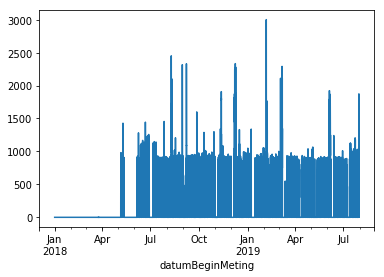

In [120]:
series.plot()

In [98]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


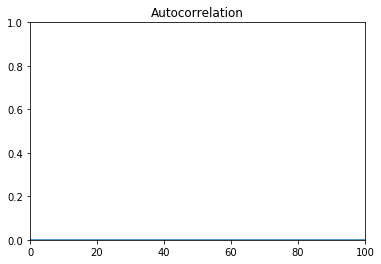

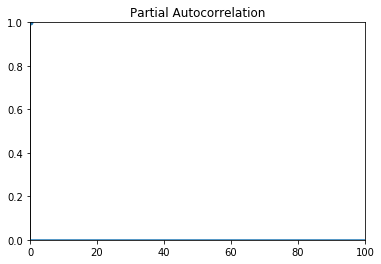

In [73]:

plot_acf(series, lags = 10)
plt.xlim(0,10)
plt.ylim(0, 1)
pyplot.show()

plot_pacf(series, lags = 10)
plt.xlim(0,10)
plt.ylim(0, 1)
pyplot.show()

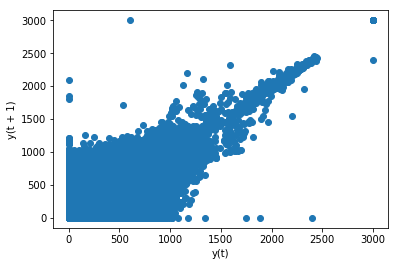

In [28]:
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [29]:
from statsmodels.tsa.arima_model import ARMAResults
print(ARMAResults.summary())

TypeError: summary() missing 1 required positional argument: 'self'

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
test_stationarity(y)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq = 1)
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue